100%|██████████| 562M/562M [00:09<00:00, 59.9MB/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.3620 - loss: 2.2072 - val_accuracy: 0.6108 - val_loss: 1.3180
Epoch 2/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6329 - loss: 1.2419 - val_accuracy: 0.6761 - val_loss: 1.0919
Epoch 3/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6985 - loss: 1.0132 - val_accuracy: 0.7411 - val_loss: 0.8799
Epoch 4/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7527 - loss: 0.8331 - val_accuracy: 0.7819 - val_loss: 0.7445
Epoch 5/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7911 - loss: 0.7063 - val_accuracy: 0.8040 - val_loss: 0.6600
Epoch 6/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8161 - loss: 0.6205 - val_accuracy: 0.8210 - val_loss: 0.5973
Epoch 7/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8315 - loss: 0.5638 - val_accuracy: 0.8307 - val_loss: 0.5633
Epoch 8/10
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8426 - loss: 0

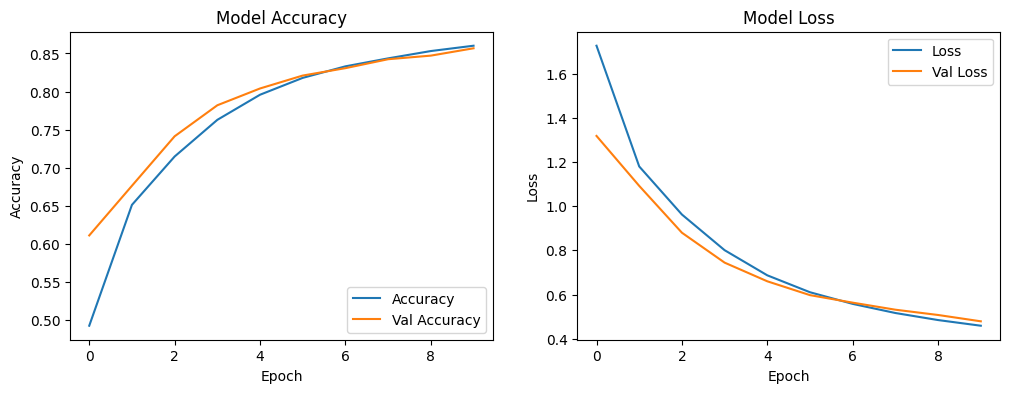

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


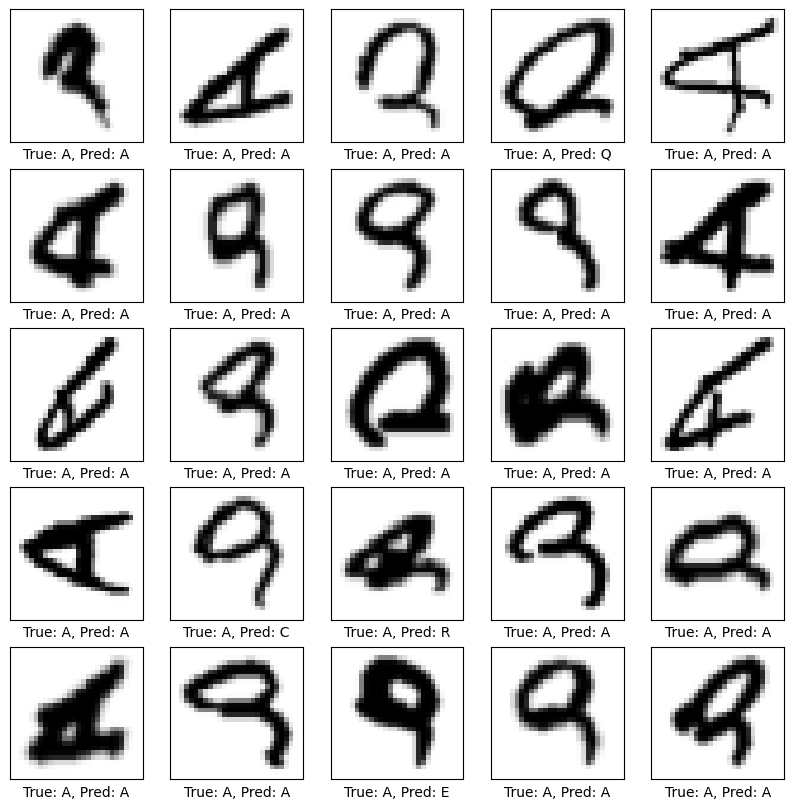

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Load and Prepare the EMNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.EMNIST(root="./data", split='letters', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.EMNIST(root="./data", split='letters', train=False, download=True, transform=transform)

# Convert to NumPy Arrays
x_train = np.array([np.array(img[0]) for img in train_dataset])[:, 0, :, :]
y_train = np.array([img[1] for img in train_dataset]) - 1  # Adjust labels to start from 0
x_test = np.array([np.array(img[0]) for img in test_dataset])[:, 0, :, :]
y_test = np.array([img[1] for img in test_dataset]) - 1  # Adjust labels to start from 0

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 26)  # 26 classes for letters
y_test = to_categorical(y_test, 26)

# Build the Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # Output layer for 26 letters
])

# Compile the Model with different learning rates
learning_rate = 1e-3  # Change this to 1e-4 if needed
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()

# Visualize some predictions
predictions = model.predict(x_test)
letter_labels = [chr(i) for i in range(65, 91)]  # A-Z letters

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    true_label = letter_labels[np.argmax(y_test[i])]
    predicted_label = letter_labels[np.argmax(predictions[i])]
    plt.xlabel(f"True: {true_label}, Pred: {predicted_label}")
plt.show()